In [29]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info



In [35]:
%run pandas_missing.ipynb

CARGAR DATA SETTTT

In [ ]:
dowload_df_indian_diabetes = 'https://static.platzi.com/media/tmp/class-files/github/curso-datos-faltantes/curso-datos-faltantes-main/data/pima-indians-diabetes.csv'

In [ ]:
!wget -O ./data/df_indian_diabetes.csv { dowload_df_indian_diabetes } -q


In [ ]:
df_indian_diabetes = pd.read_csv('./data/df_indian_diabetes.csv', sep=',', names= [        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",])




In [ ]:
df_indian_diabetes.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
base_url= "https://github.com/njtierney/naniar/blob/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }?raw=true"
    
    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

In [ ]:
locals().update(**datasets_dfs)
del datasets_dfs

In [ ]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, df_indian_diabetes.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [ ]:
riskfactors_df.info()
riskfactors_df.size
riskfactors_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

(245, 34)

In [ ]:
riskfactors_df.size

8330

In [ ]:
riskfactors_df.missing.number_complete()

7144

In [ ]:
riskfactors_df.missing.number_missing()

1186

In [ ]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [ ]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


In [ ]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [ ]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


In [ ]:
riskfactors_df.missing.missing_variable_span(variable= 'pregnant', span_every=50)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,46,4,92.0,8.0
1,1,44,6,88.0,12.0
2,2,45,5,90.0,10.0
3,3,44,6,88.0,12.0
4,4,36,9,80.0,20.0


In [ ]:
riskfactors_df.missing.missing_variable_run(variable= 'pregnant')

,run_length,is_na
0,9,missing
1,1,complete
2,14,missing
3,1,complete
4,4,missing
5,1,complete
6,5,missing
7,1,complete
8,24,missing
9,1,complete


VISUALIZACIÓN DE VALORES FALTANTES

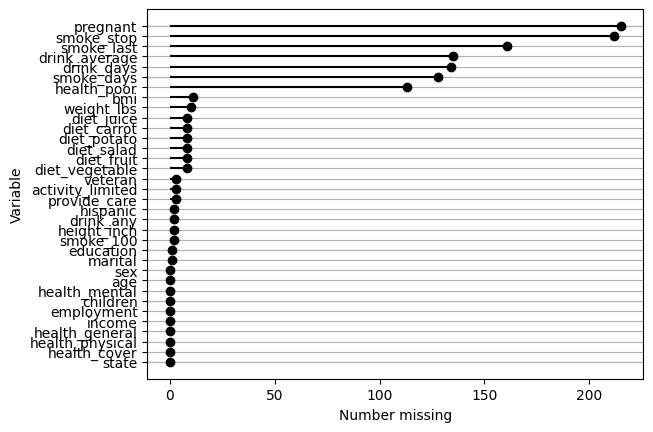

In [ ]:
riskfactors_df.missing.missing_variable_plot()

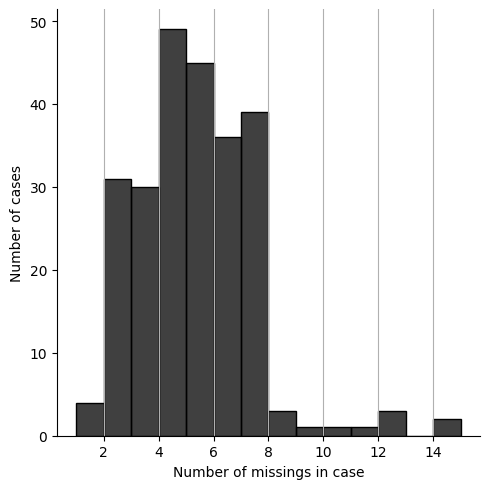

In [ ]:
riskfactors_df.missing.missing_case_plot()

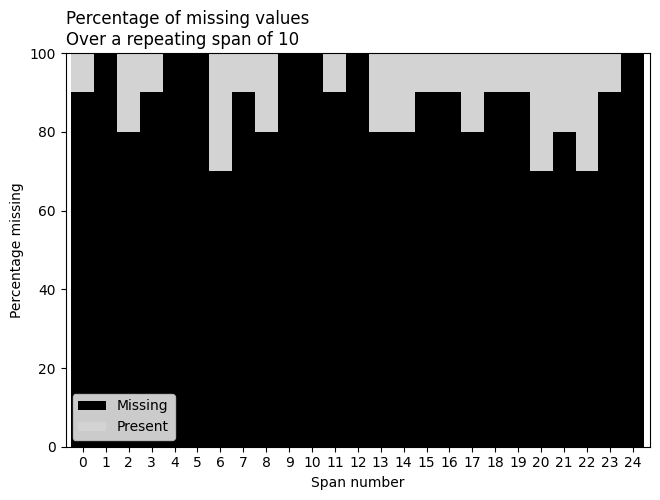

In [ ]:
riskfactors_df.missing.missing_variable_span_plot(variable='pregnant', span_every=10, rot=0)

<Axes: >

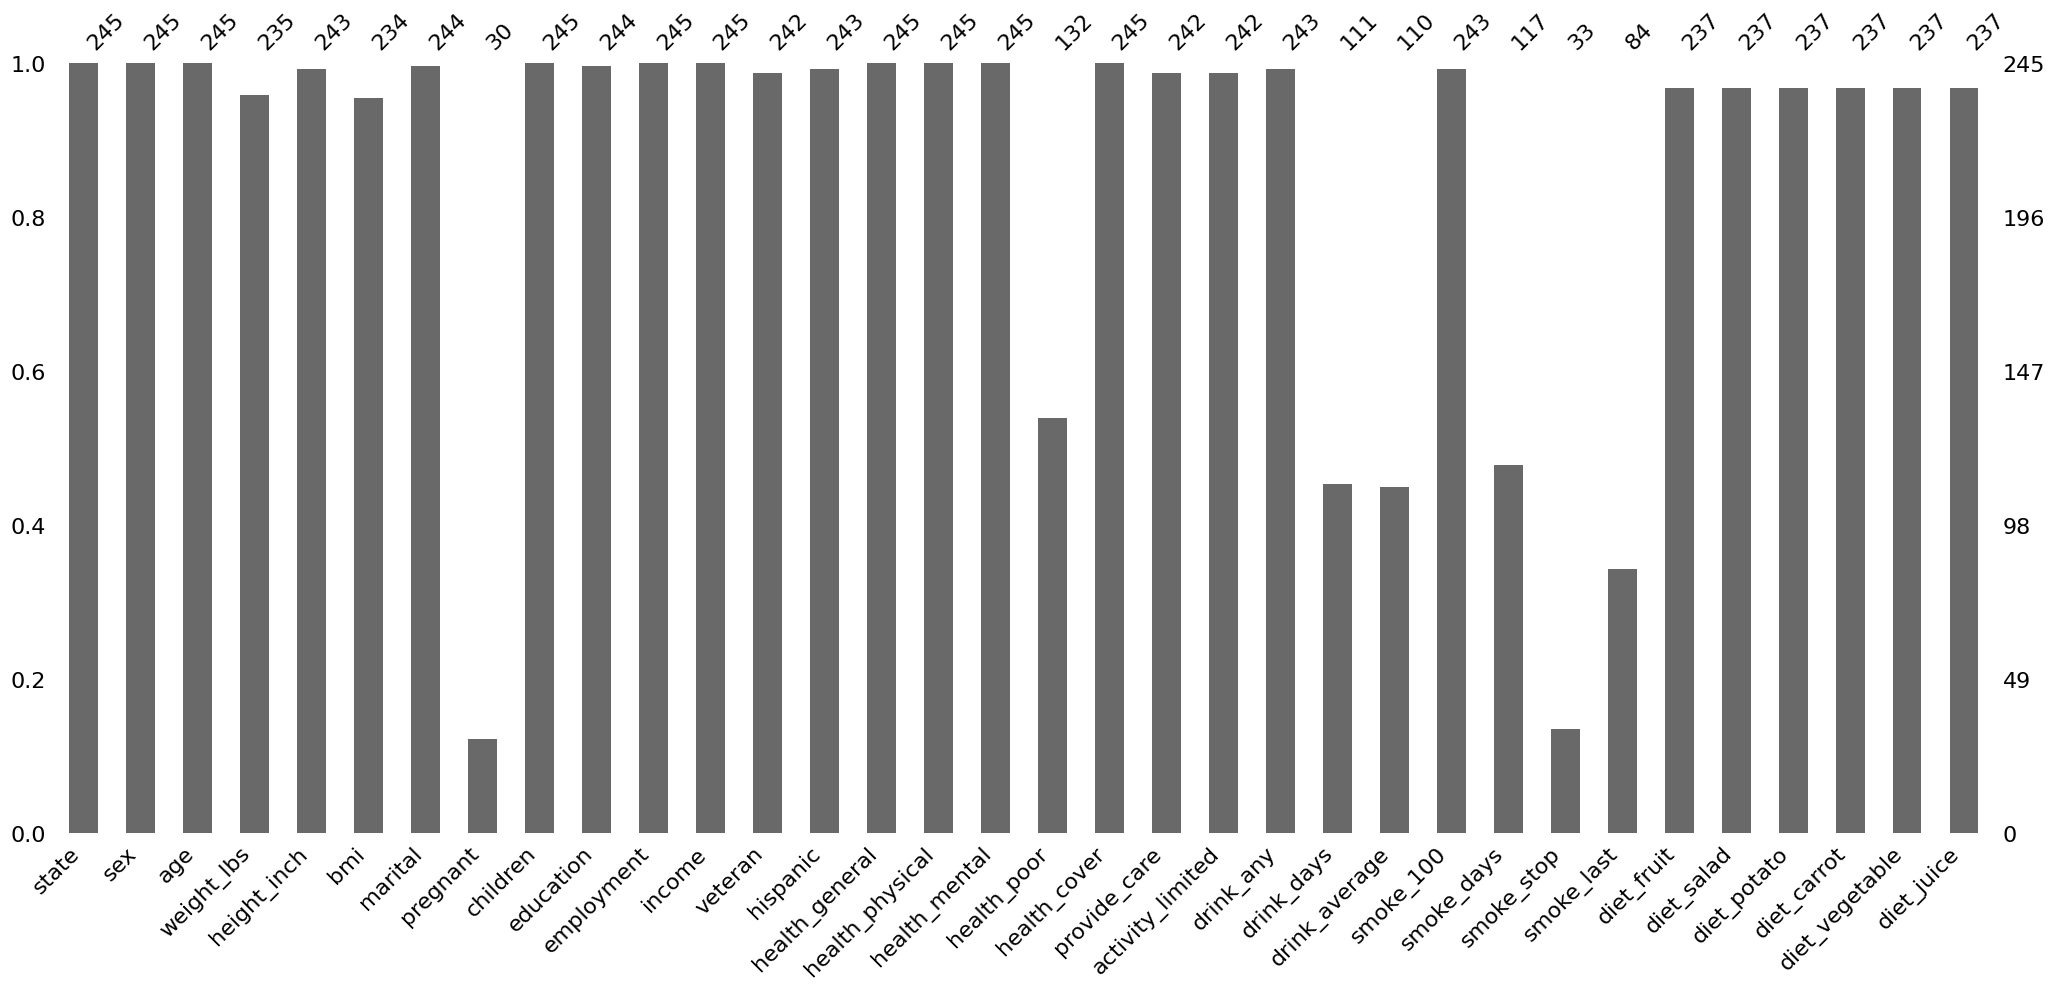

In [ ]:
missingno.bar(df= riskfactors_df)

<Axes: >

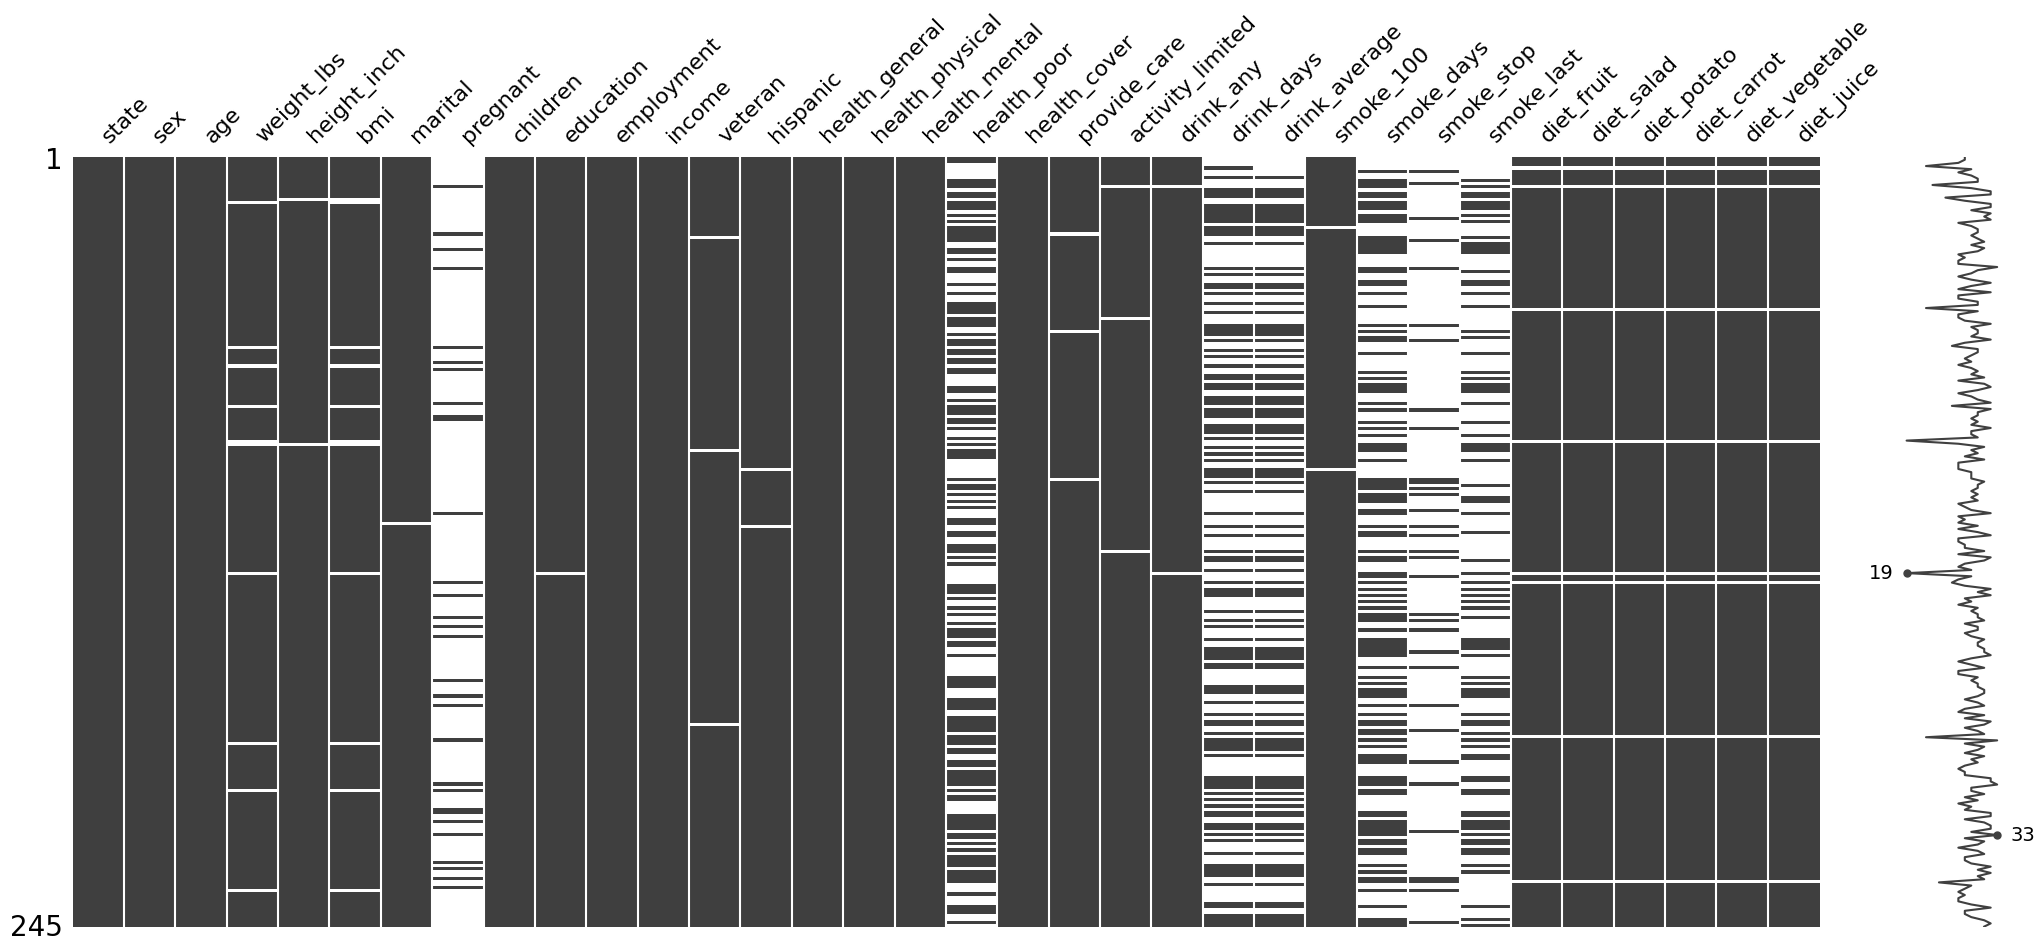

In [ ]:
missingno.matrix(df= riskfactors_df)

<Axes: >

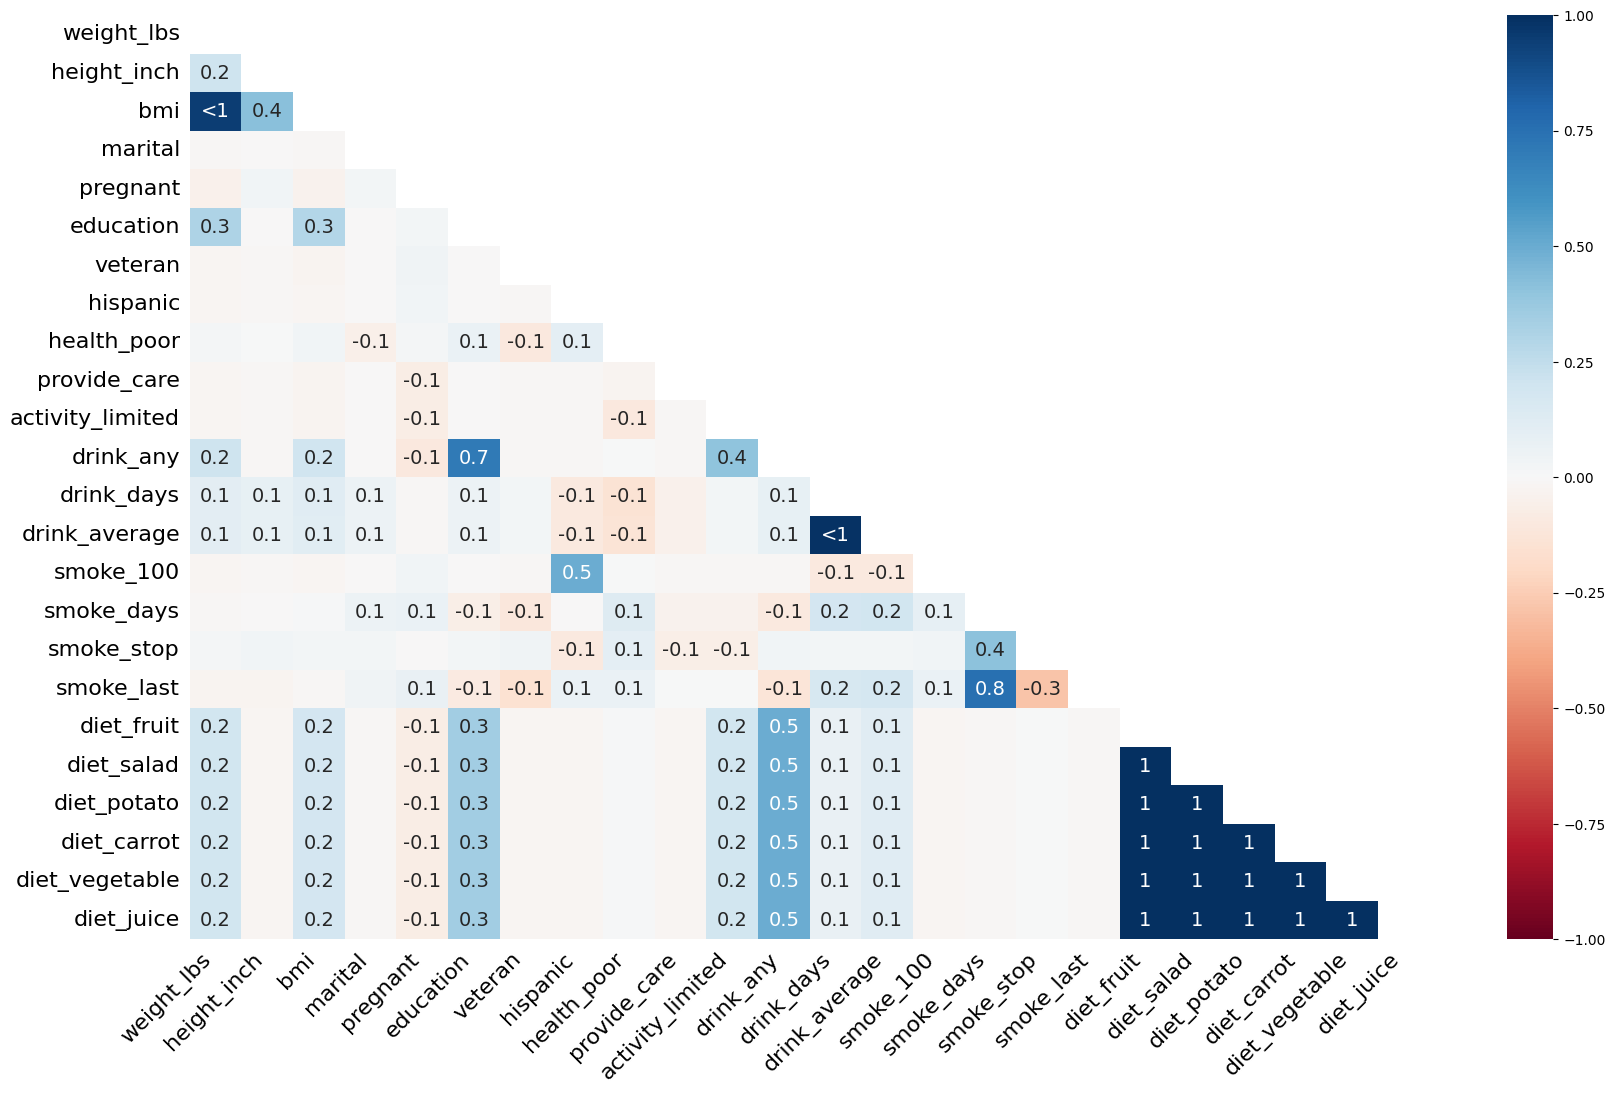

In [ ]:
missingno.heatmap(df=riskfactors_df)